In [4]:
"Workshop on DeepWalk Algorithm using Karate Club"

import networkx as nx
import matplotlib.pyplot as plt


Numer of nodes (club-members) 34


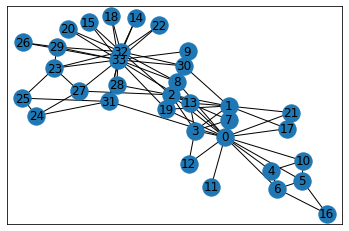

In [7]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print("Numer of nodes (club-members)", len(G.nodes))
nx.draw_networkx(G)
plt.show()


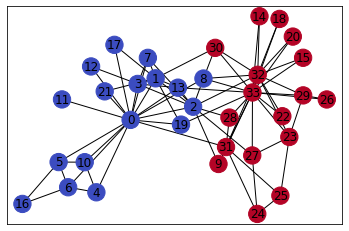

In [8]:
"plot graph with labels"
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) # Clubs: 'Officer' or 'Mr.Hi'

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = layout_pos, node_color=labels, cmap='coolwarm')
plt.show()

In [16]:
"Number of Labels"
print(f"nr of labels: {G.nodes[1]['club']}")

nr of labels: Mr. Hi


In [13]:
"Perform node embedding using DeepWalk"
from karateclub import DeepWalk
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features): ', embedding.shape)

Embedding array shape (nodes x features):  (34, 124)


low dimensional embedding representation (nodesx2):  [[ 1.5893313   0.54183954]
 [ 0.7958684   0.904891  ]
 [ 0.55733246 -0.2010384 ]
 [ 1.0346645   0.6036653 ]
 [ 2.3065825  -0.5234565 ]
 [ 2.3036869  -0.7518513 ]
 [ 3.003284   -0.7504887 ]
 [ 0.618393    0.8640977 ]
 [-0.07608942  0.16499187]
 [-1.0100791   0.34414458]
 [ 2.5779731  -0.5760868 ]
 [ 1.4566505   0.37542143]
 [ 1.0089593   0.30864212]
 [ 0.41968402  0.59042543]
 [-1.6473571   0.15493931]
 [-1.6840035  -0.09216045]
 [ 2.7768009  -1.0797285 ]
 [ 0.97527057  0.36504868]
 [-1.2073857  -0.04872838]
 [ 0.21277915  0.6227772 ]
 [-0.8388042   0.16661584]
 [ 1.1175357   1.1470386 ]
 [-1.0753618   0.17679437]
 [-1.5540241  -0.69092166]
 [-1.2474914  -0.97507125]
 [-1.503494   -0.98551846]
 [-1.8350226   0.16625223]
 [-1.7499803  -0.33076954]
 [-0.6632274  -0.3212426 ]
 [-1.7873138  -0.20293544]
 [-0.61178625  0.880359  ]
 [-0.828054   -0.7017199 ]
 [-1.4945706  -0.09941846]
 [-1.9407513  -0.04680659]]


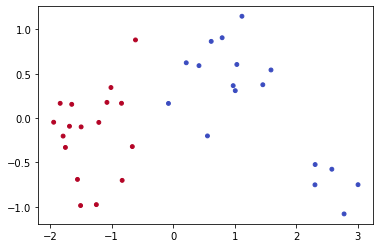

In [19]:
"Low Dimensional plot of the nodes x features"
import sklearn
import matplotlib.pyplot as plt

PCA_model = sklearn.decomposition.PCA(n_components=2)
low_dimension_embedding = PCA_model.fit_transform(embedding)
print('low dimensional embedding representation (nodesx2): ', low_dimension_embedding)
plt.scatter(low_dimension_embedding[:,0], low_dimension_embedding[:,1], c=labels, s=15, cmap='coolwarm')

In [26]:
"Node Classification using embedded model"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

x_train, x_text, y_train, y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = ML_model.predict(x_text)
ML_acc = roc_auc_score(y_test, y_predict)
print('AUC: ', ML_acc)

AUC:  0.9166666666666667
